In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if int(os.environ.get("MODERN_PANDAS_EPUB", 0)):
    import prep # no qa
    
sns.set_style('ticks')
sns.set_context('talk')

In [2]:
import time

size_per = 5000
N = 100
cols = list('abcd')

def timed(n=30):
    
    def deco(func):
        def wrapper(*args, **kwargs):
            timings = []
            for i in range(n):
                t0 = time.time()
                func(*args, **kwargs)
                t1 = time.time()
                timings.append(t1 - t0)
            return timings
        return wrapper
    return deco

@timed(60)
def append_df():
    
    df = pd.DataFrame(columns=cols)
    for _ in range(N):
        df.append(pd.DataFrame(np.random.randn(size_per, 4), columns=cols))
    return df

@timed(60)
def concat_df():
    
    dfs = [pd.DataFrame(np.random.randn(size_per, 4), columns=cols)
          for _ in range(N)]
    return pd.concat(dfs, ignore_index=True)

In [3]:
t_append = append_df()
t_concat = concat_df()

timings = (pd.DataFrame({"Append": t_append, "Concat": t_concat})
              .stack()
              .reset_index()
              .rename(columns={0: 'Time (s)',
                              'level_1': 'Method'}))
timings.head()

,level_0,Method,Time (s)
0,0,Append,0.155975
1,0,Concat,0.093592
2,1,Append,0.124780
3,1,Concat,0.093592
4,2,Append,0.126780


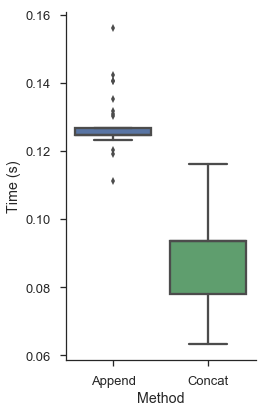

In [4]:
plt.figure(figsize=(4, 6))
sns.boxplot(x='Method', y='Time (s)', data=timings)
sns.despine()
plt.tight_layout()

In [5]:
location1 = r'C:\Users\adai\Documents\GitHub\PythonFiles\data\439091137_T_ONTIME.csv'

df = pd.read_csv(location1)
delays = df['DEP_DELAY']

In [6]:
# Select the 5 largest delays
delays.nlargest(5).sort_values()

102482    1480.0
151947    1545.0
147676    1934.0
63020     1970.0
52705     2755.0
Name: DEP_DELAY, dtype: float64

In [7]:
delays.nsmallest(5).sort_values()

295838   -59.0
239632   -58.0
199996   -56.0
321393   -56.0
335979   -55.0
Name: DEP_DELAY, dtype: float64

In [8]:
%timeit delays.sort_values().tail(5)

10 loops, best of 3: 40.5 ms per loop


In [9]:
%timeit delays.nlargest(5).sort_values()

100 loops, best of 3: 12 ms per loop


In [10]:
import requests
import zipfile

In [11]:
headers = {
    'Pragma': 'no-cache',
    'Origin': 'http://www.transtats.bts.gov',
    'Accept-Encoding': 'gzip, deflate',
    'Accept-Language': 'en-US,en;q=0.8',
    'Upgrade-Insecure-Requests': '1',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4) AppleWebKit/537.36'\
                  '(KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36',
    'Content-Type': 'application/x-www-form-urlencoded',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    'Cache-Control': 'no-cache',
    'Referer': 'http://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=288&DB_Short_'
               'Name=Aviation%20Support%20Tables',
    'Connection': 'keep-alive',
    'DNT': '1',
}

location2 = r'C:\Users\adai\Documents\GitHub\effective-pandas\url_4.txt'

if not os.path.exists('data/airports.csv.zip'):
    with open(location2) as f:
        data = f.read().strip()

    r = requests.post('http://www.transtats.bts.gov/DownLoad_Table.asp?Table_ID=288&Has'
                      '_Group=0&Is_Zipped=0', data=data, headers=headers)

    with open('data/airports.csv.zip', 'wb') as f:
        f.write(r.content)

In [12]:
zf = zipfile.ZipFile("data/airports.csv.zip")
fp = zf.extract(zf.filelist[0], path='data')
airports = pd.read_csv(fp)

BadZipFile: File is not a zip file